In [2]:
pip install pymysql

  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install flask_sqlalchemy

  Using cached Flask_SQLAlchemy-2.5.1-py2.py3-none-any.whl (17 kB)
  Using cached Flask-2.0.1-py3-none-any.whl (94 kB)
  Using cached Jinja2-3.0.1-py3-none-any.whl (133 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached itsdangerous-2.0.1-py3-none-any.whl (18 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pymysql
from sqlalchemy import create_engine

username = 'cfb101spade'
password = 'jo3m4284gj4rm4'
host_port = '34.81.77.216:3306' 
database = 'twfruits'


In [3]:
import pandas as pd       
# 建立連線
engine = create_engine("mysql+pymysql://{}:{}@{}/{}".format(username, password, host_port, database))
con = engine.connect()
# pd.read_sql(table名稱, 連線資訊)
df = pd.read_sql('guava_台北一', engine)
# 關閉連線
con.close

<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x00000218063FF280>>

In [4]:
df

,日期,guava_平均價,guava_交易量,emperorguava_平均價,banana_平均價,guava_前日平均價,guava_5日平均價
0,2011-01-01,43.4,34632.0,55.1,26.9,43.4,45.1
1,2011-01-02,48.2,25303.0,66.8,28.9,43.4,45.1
2,2011-01-03,45.9,31061.5,67.3,29.8,48.2,45.1
3,2011-01-04,43.6,36820.0,67.8,30.7,45.9,45.1
4,2011-01-05,44.4,25043.0,62.9,31.0,43.6,45.1
...,...,...,...,...,...,...,...
3875,2021-08-11,25.7,50129.0,35.8,39.3,35.3,33.3
3876,2021-08-12,25.9,35355.0,39.5,45.7,25.7,33.1
3877,2021-08-13,27.2,35189.0,45.3,41.6,25.9,30.4
3878,2021-08-14,32.7,31684.0,49.7,39.8,27.2,29.4


In [5]:
from pandas import Series

df = df[["日期","guava_平均價"]]
df

,日期,guava_平均價
0,2011-01-01,43.4
1,2011-01-02,48.2
2,2011-01-03,45.9
3,2011-01-04,43.6
4,2011-01-05,44.4
...,...,...
3875,2021-08-11,25.7
3876,2021-08-12,25.9
3877,2021-08-13,27.2
3878,2021-08-14,32.7


In [6]:
#儲存日期
date_orginal = df["日期"]
date_orginal

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
3875   2021-08-11
3876   2021-08-12
3877   2021-08-13
3878   2021-08-14
3879   2021-08-15
Name: 日期, Length: 3880, dtype: datetime64[ns]

In [7]:
df['日期'] = pd.to_datetime(df['日期'])
df = df.set_index(['日期'], drop=True)

In [8]:
df.head(5)

,guava_平均價
日期,
2011-01-01,43.4
2011-01-02,48.2
2011-01-03,45.9
2011-01-04,43.6
2011-01-05,44.4


<AxesSubplot:xlabel='日期'>

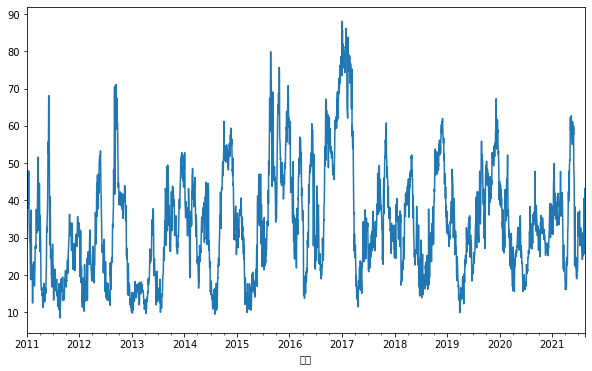

In [10]:
plt.figure(figsize=(10, 6))

df['guava_平均價'].plot()

In [11]:
#單根檢定
#評斷標準:(1)ADF統計值 < 臨界值 (2) **p-value < 0.05
result = adfuller(df['guava_平均價'])
print('p-value: {}'.format(round(result[1],4)))
#結果 : 小於顯著水準，拒絕虛無假設 → 資料為定態

p-value: 0.0


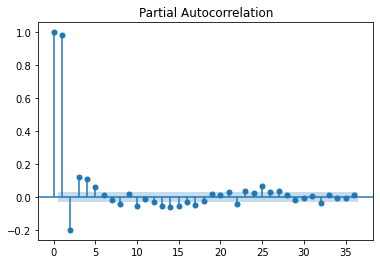

In [12]:
#挑選p參數，透過偏自相關函數圖PACF圖
plot_pacf(df)
plt.show()

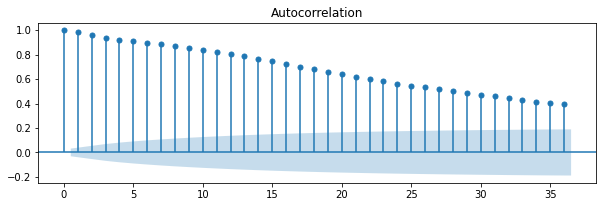

In [13]:
#挑選q參數透過自相關函數圖ACF圖
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
# fig = plot_acf(data)
fig = plot_acf(df, ax=ax1, title="Autocorrelation")

In [14]:
import pmdarima as pm
model_fit = pm.auto_arima(df.guava_平均價, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=18817.508, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=39024.054, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33935.871, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18816.929, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18731.597, Time=2.66 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=18724.171, Time=3.25 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=18678.957, Time=5.82 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=18721.578, Time=1.75 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.92 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=18720.385, Time=1.93 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=18694.2

In [16]:
model = ARIMA(df, order=(3, 0, 2))
results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:              guava_平均價   No. Observations:                 3880
Model:                     ARMA(3, 2)   Log Likelihood               -9340.608
Method:                       css-mle   S.D. of innovations              2.686
Date:                Wed, 18 Aug 2021   AIC                          18695.216
Time:                        23:47:34   BIC                          18739.061
Sample:                    01-01-2011   HQIC                         18710.782
                         - 08-15-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              34.0844      2.658     12.822      0.000      28.874      39.295
ar.L1.guava_平均價     1.8507      0.060     30.806      0.000       1.733       1.968
ar.L2.guava_平均價    -1.3178      

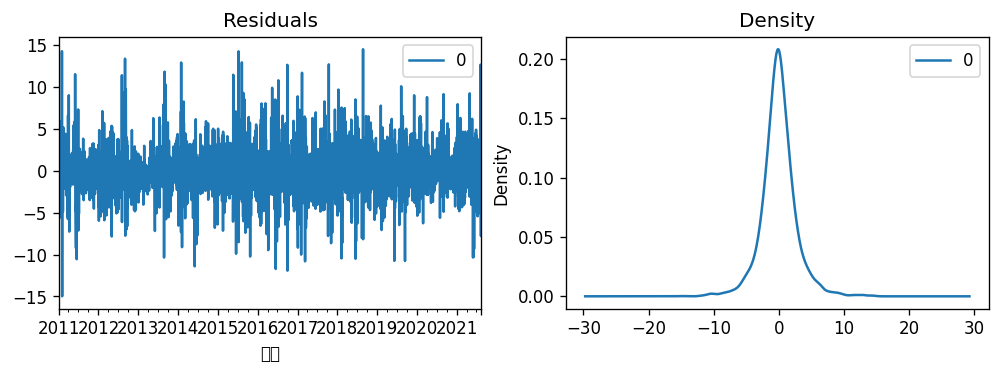

In [17]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [18]:
#把index年份去除,改為0-29數字
test = df.guava_平均價[-30:]
test_2 = test
test_2 = test_2.reset_index(drop=True)

0     32.7
1     31.8
2     30.8
3     29.7
4     28.8
5     31.3
6     28.3
7     31.5
8     28.8
9     28.4
10    27.9
11    25.0
12    24.2
13    28.0
14    25.9
15    25.1
16    27.6
17    30.2
18    27.4
19    26.2
20    26.0
21    27.2
22    40.5
23    37.9
24    35.3
25    25.7
26    25.9
27    27.2
28    32.7
29    43.2
Name: guava_平均價, dtype: float64

[29.68318728 29.62331899 29.66252938 29.75983966 29.86196063 29.94191656
 30.00043908 30.0500772  30.10113504 30.15679426 30.21520145 30.27338987
 30.32967584 30.38395328 30.43688396 30.48908215 30.5407824  30.5919189
 30.64233928 30.69195065 30.74074853 30.78877691 30.8360816  30.88268844
 30.92860547 30.97383438 31.01837929 31.06224904 31.10545535 31.14801016]


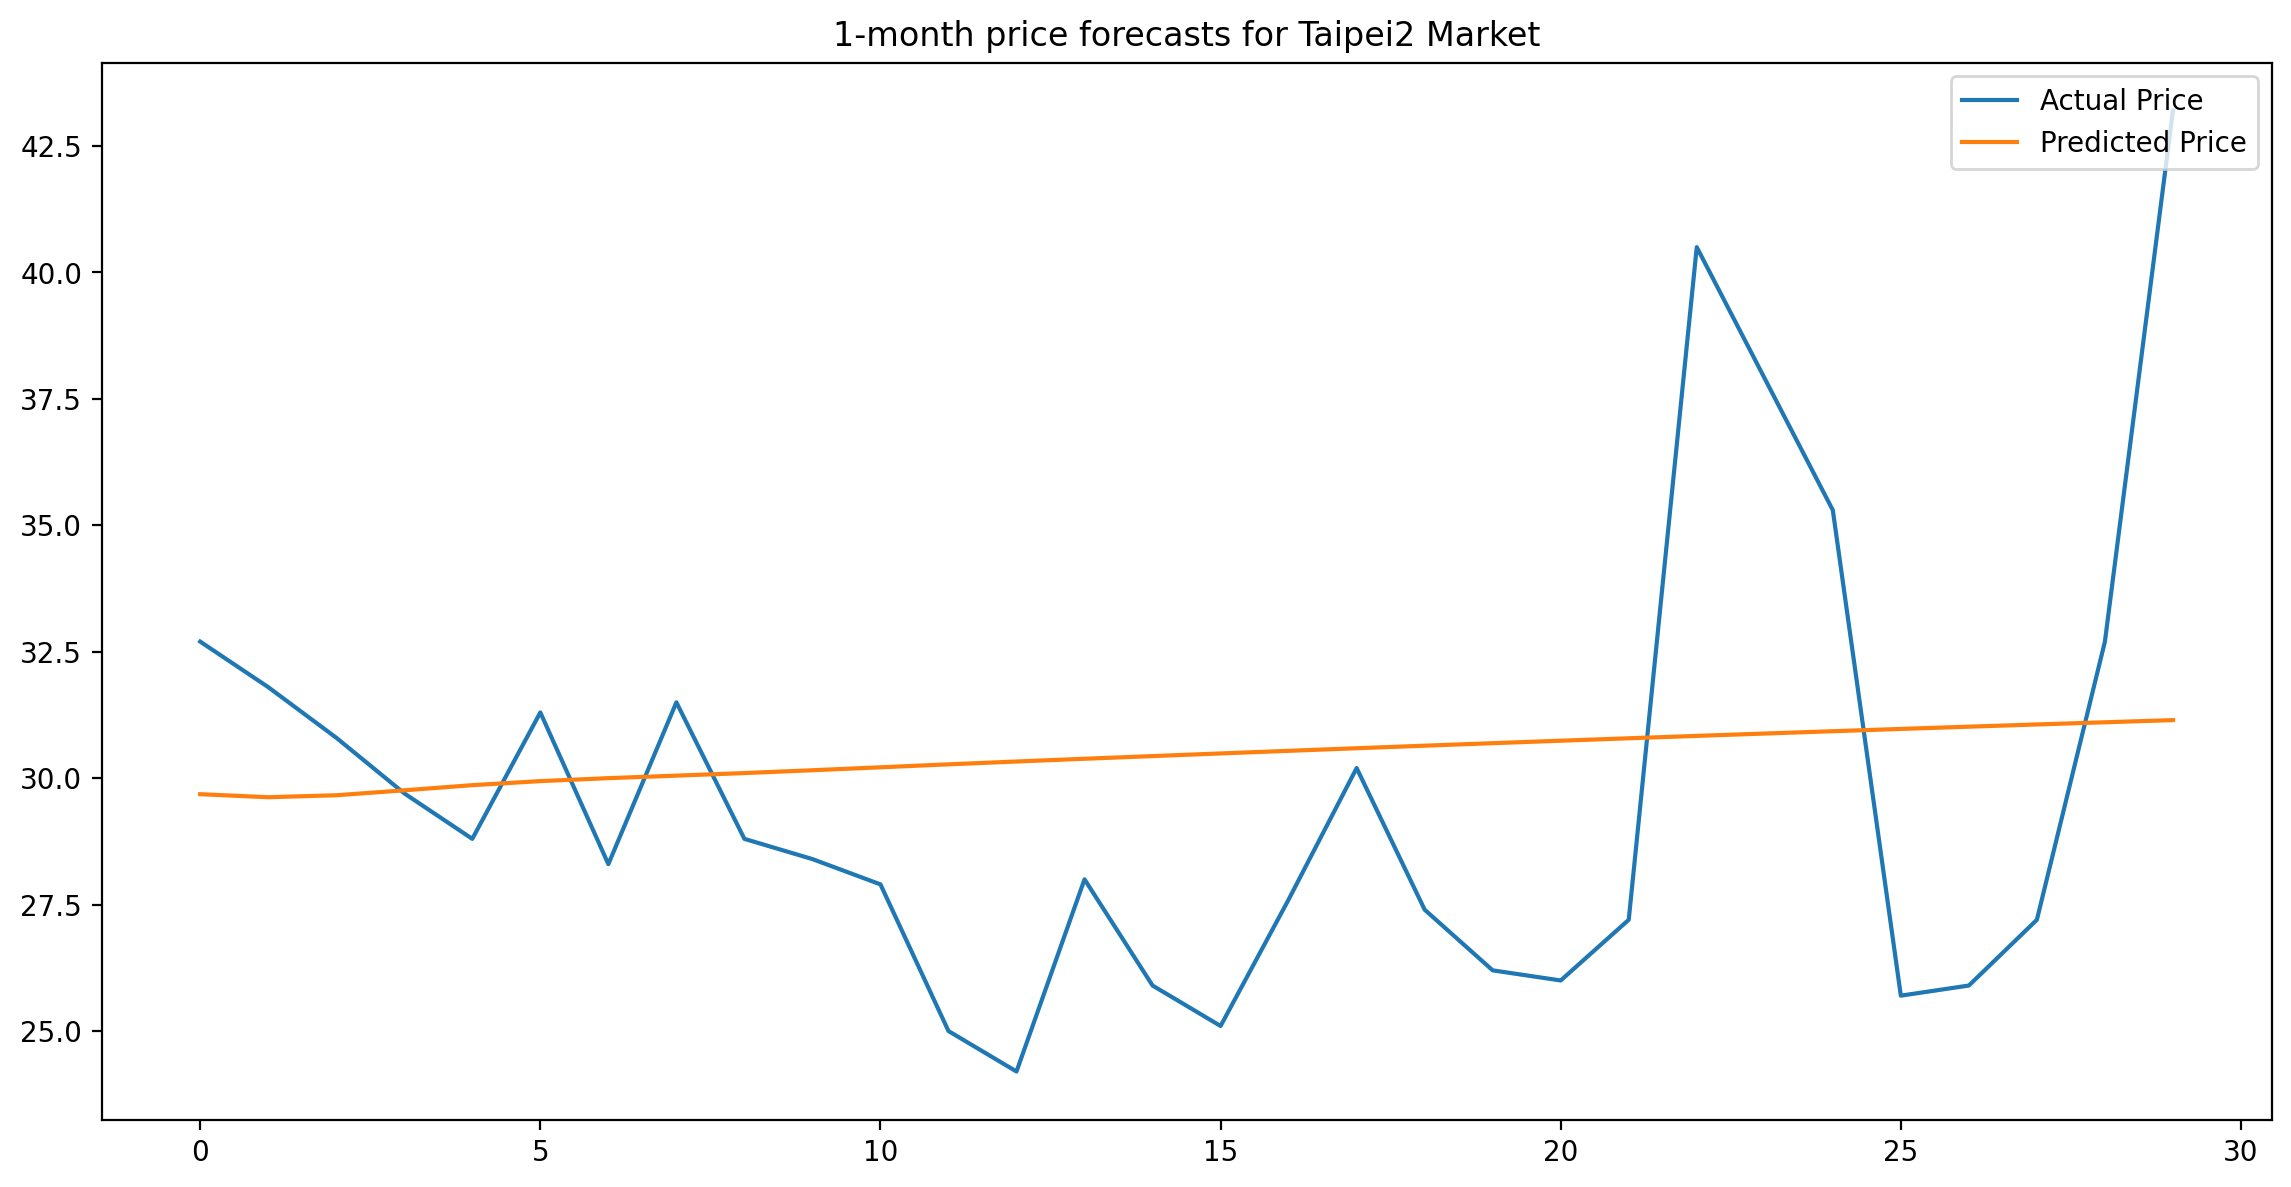

In [19]:
from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.arima.model import ARIMA


# Create Training and Test
train = df.guava_平均價[:-30]
test = df.guava_平均價[-30:]

for i in range(len(test)):
# Build Model
# model = ARIMA(train, order=(3,2,1))  
    model = ARIMA(train, order=(3, 0, 2))  
    fitted = model.fit(disp=0)  

    # Forecast
    fc, se, conf = fitted.forecast(30, alpha=0.05)  # 95% conf
    

    # # Make as pandas series
#     fc_series = pd.Series(fc, index=test.index)
    fc_series = pd.Series(fc,index=test_2.index)

print(fc)
# Plot
plt.figure(figsize=(14,7), dpi=200)
# plt.plot(train, label='training')
plt.plot(test_2, label='Actual Price')
plt.plot(fc_series, label='Predicted Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('1-month price forecasts for Taipei2 Market')
plt.legend(loc='upper right', fontsize=10)
plt.show()


In [20]:
plt.savefig('./芭樂台北1.jpg')#儲存圖片

<Figure size 1200x360 with 0 Axes>

In [21]:
#RMSE
from math import sqrt
RMSE = sqrt(mean_squared_error(test_2, fc_series))
print(RMSE)

4.499046588264924


In [26]:
#MAPE
def mape(test, predictions):
    return np.mean(np.abs((fc_series - test_2) / test_2)) * 100

In [27]:
MAPE = mape(test_2, fc_series)
print(MAPE)

12.196833772737682


In [25]:
#MAD
MAD = sum (abs(test_2-fc_series))/len(test_2)
MAD

3.646582138306693